## MNIST Datasets - CNN v1
- 2 x Conv2D layers
- 1 FCN layer
- 1 Output layer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [8]:
model_path = './models/best-mnist-cnn-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [9]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
236/240 [============================>.] - ETA: 0s - loss: 0.1537 - accuracy: 0.9528
Epoch 00001: val_loss improved from inf to 0.05669, saving model to ./models\best-mnist-cnn-v1.h5
240/240 [==============================] - 11s 14ms/step - loss: 0.1521 - accuracy: 0.9532 - val_loss: 0.0567 - val_accuracy: 0.9833
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.0355 - accuracy: 0.9892
Epoch 00002: val_loss improved from 0.05669 to 0.05386, saving model to ./models\best-mnist-cnn-v1.h5
240/240 [==============================] - 3s 12ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0539 - val_accuracy: 0.9858
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9944
Epoch 00003: val_loss improved from 0.05386 to 0.04580, saving model to ./models\best-mnist-cnn-v1.h5
240/240 [==============================] - 3s 12ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0458 - val_accuracy: 0.9874
Epoch 4/10

In [10]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9871


[0.0429680272936821, 0.9871000051498413]

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

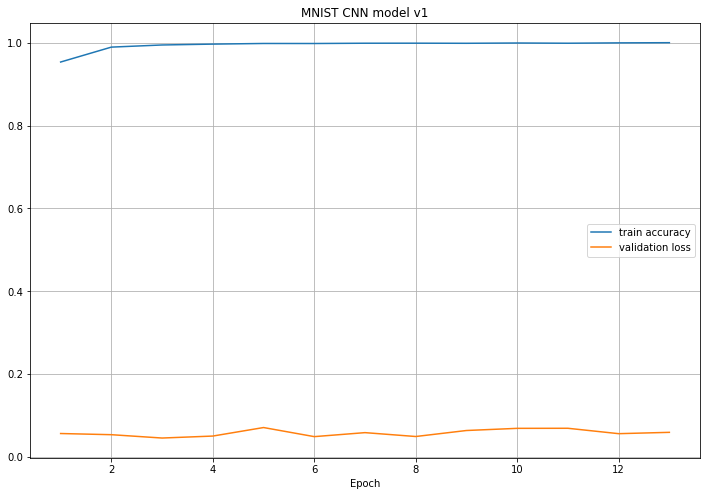

In [12]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v1')
plt.show()

## MNIST Datasets - CNN v2
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 FCN layer
- 1 Output layer

In [13]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [14]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [15]:
model_path = './models/best-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [16]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
238/240 [============================>.] - ETA: 0s - loss: 0.1923 - accuracy: 0.9424
Epoch 00001: val_loss improved from inf to 0.06221, saving model to ./models\best-mnist-cnn-v2.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.1913 - accuracy: 0.9427 - val_loss: 0.0622 - val_accuracy: 0.9815
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9859
Epoch 00002: val_loss improved from 0.06221 to 0.05448, saving model to ./models\best-mnist-cnn-v2.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0545 - val_accuracy: 0.9850
Epoch 3/100
233/240 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9918
Epoch 00003: val_loss improved from 0.05448 to 0.04065, saving model to ./models\best-mnist-cnn-v2.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0407 - val_accuracy: 0.9882
Epoch 4/100
24

In [17]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9902


[0.03146347776055336, 0.9901999831199646]

In [18]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

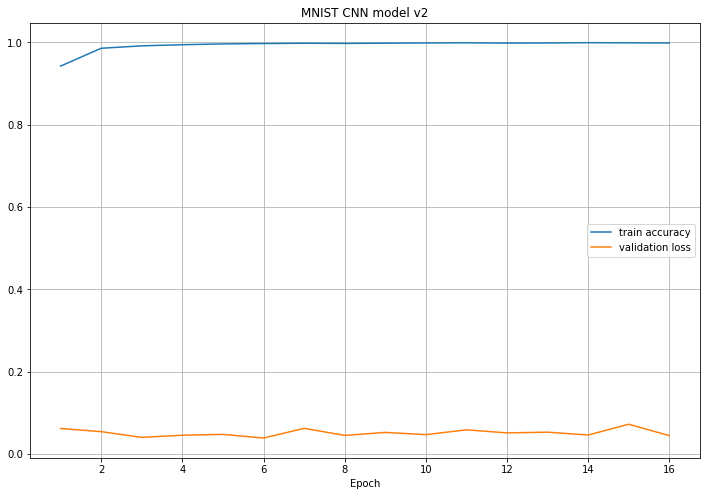

In [19]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v2')
plt.show()

## MNIST Datasets - CNN v3
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [21]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4719104   
                                                      

In [22]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [23]:
model_path = './models/best-mnist-cnn-v3.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [24]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9325
Epoch 00001: val_loss improved from inf to 0.05639, saving model to ./models\best-mnist-cnn-v3.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.2200 - accuracy: 0.9325 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 2/100
238/240 [============================>.] - ETA: 0s - loss: 0.0622 - accuracy: 0.9811
Epoch 00002: val_loss improved from 0.05639 to 0.04965, saving model to ./models\best-mnist-cnn-v3.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 3/100
236/240 [============================>.] - ETA: 0s - loss: 0.0425 - accuracy: 0.9870
Epoch 00003: val_loss improved from 0.04965 to 0.03875, saving model to ./models\best-mnist-cnn-v3.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0388 - val_accuracy: 0.9884
Epoch 4/100
23

In [25]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9911


[0.027654193341732025, 0.991100013256073]

In [26]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

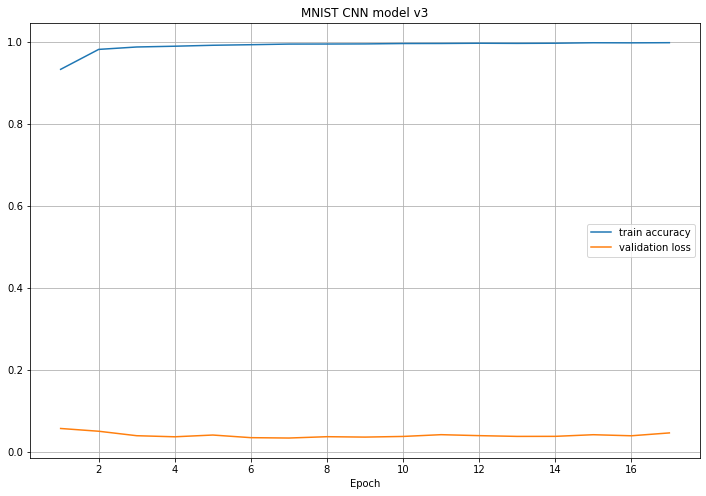

In [27]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v3')
plt.show()